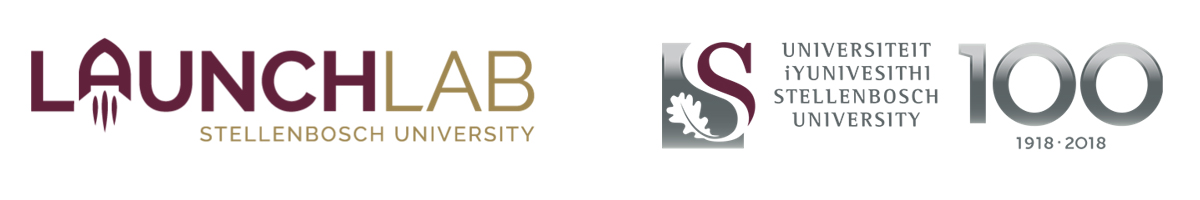

# Assignment 5 Part 2: Seaborn
The following assignment is based on the data in diamonds.csv

The features are described as follows:

Carat: a unit of weight.

Cut: the quality of the diamond's cut.

Color: the color code of the diamond.

Clarity: the clarity code of the diamond.

Depth: the size of the diamond's depth as a percentage.

Table: the size of the diamond's table as a percentage.

Price: the price of the diamond.

x, y, z: the dimensions of the diamond.

## For this assignment all plots should be written using the **seaborn** package.

In [316]:
import matplotlib.pyplot as plt

!pip install seaborn
import numpy as np
import seaborn as sns 
import pandas as pd 
%matplotlib inline

df = pd.read_csv('src/diamonds.csv',index_col=0).reset_index(drop=True)
df.head()
df.shape

(962, 10)

# Analysing Counts

## For each catergorical feature, visualise the counts using a barplot.

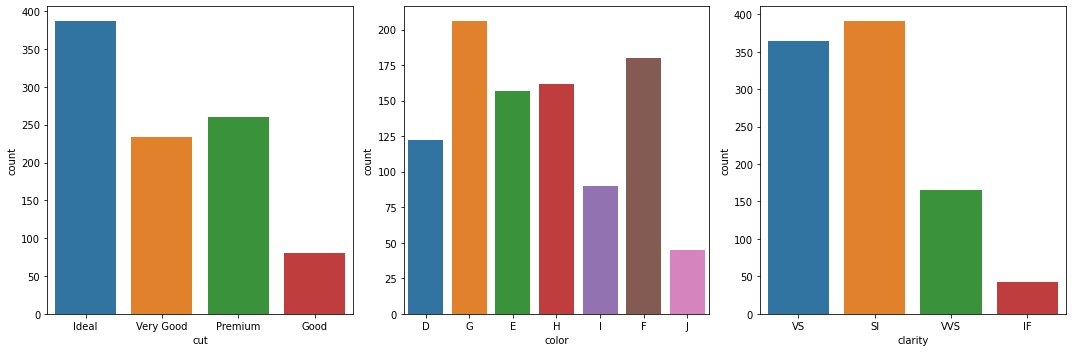

In [285]:
cuts = df['cut']   

fig, ax = plt.subplots(1,3, figsize=(15,5))
categories = ['cut','color','clarity']

sns.countplot(x = categories[0], data = df, ax=ax[0])
sns.countplot(x = categories[1], data = df, ax=ax[1])
sns.countplot(x = categories[2], data = df, ax=ax[2])

plt.tight_layout()
plt.show()


# Identifying outliers
 
## Plot for the following features boxplots to identify any outliers:
carat, depth, table and price

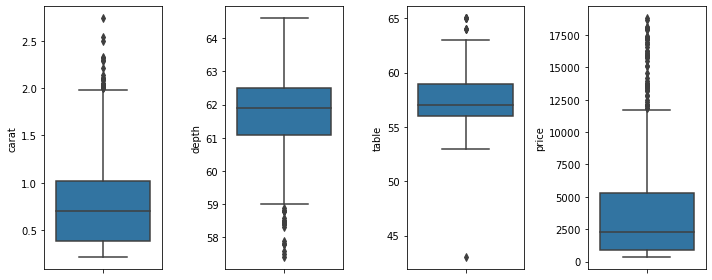

In [286]:
fig, ax = plt.subplots(1,4, figsize=(10,4))
categories = ['carat','depth','table','price']

sns.boxplot(y = categories[0], data = df, ax=ax[0])
sns.boxplot(y = categories[1], data = df, ax=ax[1])
sns.boxplot(y = categories[2], data = df, ax=ax[2])
sns.boxplot(y = categories[3], data = df, ax=ax[3])


plt.tight_layout()
plt.show()

There are many different techniques to detect outliers, here we will be using inter-quartile range (as used by matplotlib/seaborn).

Consider any points outside of 1.5 $\times$ IQR from a quartile as an outlier.

## Write code to remove these outliers from the dataframe
By removing any outliers, it is now easier to visualise the distributions of the dataset

In [301]:
#categories = ['carat','depth','table','price']


categories = ['carat','depth','table','price']

for category in categories:
    
    
    Q3 = df[category].quantile(0.75)
    Q1 = df[category].quantile(0.25)
    IQR = Q3 - Q1
    
    # Update DF
    outliers = df.loc[((df[category] < (Q1-1.5*IQR)) | (df[category] > (Q3+1.5*IQR))),category]
    outliers_bool = df[category].isin(outliers)
    df = df[~outliers_bool]

display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.53,Ideal,D,VS,61.4,56.0,1857,5.20,5.23,3.20
1,0.70,Very Good,D,SI,63.4,58.0,2734,5.63,5.66,3.58
2,1.00,Premium,G,VS,62.0,62.0,6115,6.38,6.33,3.94
3,1.22,Premium,D,SI,61.8,58.0,5643,6.86,6.80,4.22
4,0.41,Very Good,E,VS,62.7,58.0,833,4.68,4.73,2.95
...,...,...,...,...,...,...,...,...,...,...
957,0.51,Very Good,H,SI,62.0,57.0,1170,5.11,5.19,3.19
958,0.61,Ideal,E,VVS,61.3,54.0,2823,5.51,5.59,3.40
959,0.32,Ideal,G,VVS,61.9,56.0,842,4.39,4.40,2.72
960,0.51,Ideal,D,VVS,61.3,56.0,3223,5.14,5.15,3.16


## Once again plot the boxplots for the following features:
carat, depth, table and price

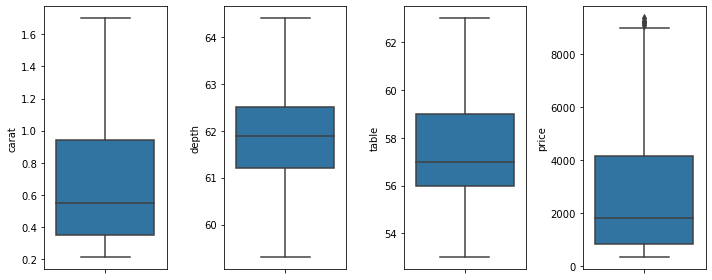

In [302]:
##    NEED TO DO THE ABOVE AND UPDATE DF FOR THIS TO BE CORRECT, SKELETON FOR NOW

fig, ax = plt.subplots(1,4, figsize=(10,4))
categories = ['carat','depth','table','price']

sns.boxplot(y = categories[0], data = df, ax=ax[0])
sns.boxplot(y = categories[1], data = df, ax=ax[1])
sns.boxplot(y = categories[2], data = df, ax=ax[2])
sns.boxplot(y = categories[3], data = df, ax=ax[3])


plt.tight_layout()
plt.show()

#sns.boxplot(y = categories[0], data = df_n, ax=ax[0])
#sns.boxplot(y = categories[1], data = df_n, ax=ax[1])
#sns.boxplot(y = categories[2], data = df_n, ax=ax[2])
#sns.boxplot(y = categories[3], data = df_n, ax=ax[3])

## Explain why the boxplots above have fliers that indicate there are still outliers present in the data?

We have only considered any points outside of 1.5  ×  IQR from a quartile as an outlier. Therefor those seemingly outlying data points are infact within our range. 

# Analysing continuous features
## Visualise the correlation of the following features:

x, y ,z and carat

Use a multi-plot grid that incorporates scatterplots and histograms in its diagonal.

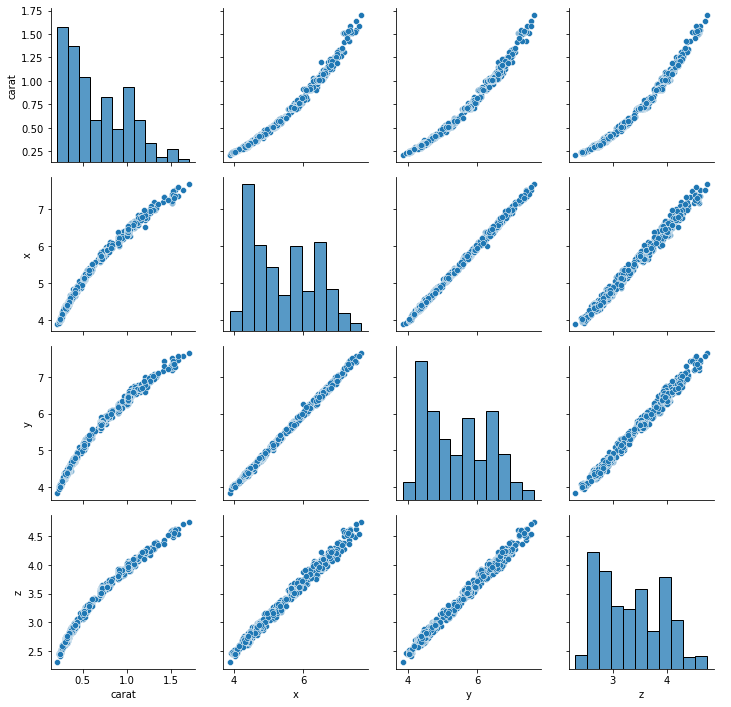

In [303]:
df_c = df.filter(['carat','x','y','z'],axis=1)

g = sns.PairGrid(df_c)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


## Comment on the reletionship between these features.
*Answer here*

## Can you explain the non-linear relationship carat exhibits with the remaining features?
*Answer here*


## Visualise the distributions of the following variables:
carat, table, depth and price

### Use a multi-plot grid that incorporates scatterplots in its upper half, histograms in its diagonal and contourplots in its lower half.

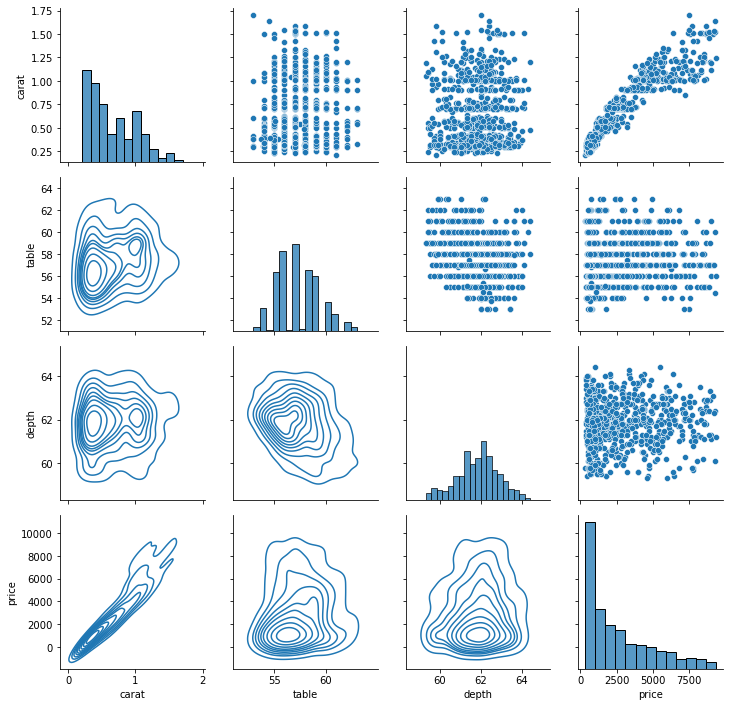

In [306]:
df_ctdp = df.filter(['carat','table','depth','price'],axis=1)

b = sns.PairGrid(df_ctdp)
b.map_upper(sns.scatterplot)
b.map_diag(sns.histplot)
b.map_lower(sns.kdeplot)

b.add_legend()

## What conclusions can you draw from the multi-plot above?
The price of the diamond increases as the carat increases. 
For a given table, the carat,depth and price can vary signicantly. This suggests that price, depth and carat are independent of the table.

## Conditional plots
Visualise the relationship **'cut'** exhibits on the following features:

carat, table, depth and price

### Use a multi-plot grid with scatterplots and density functions on the diagonal.

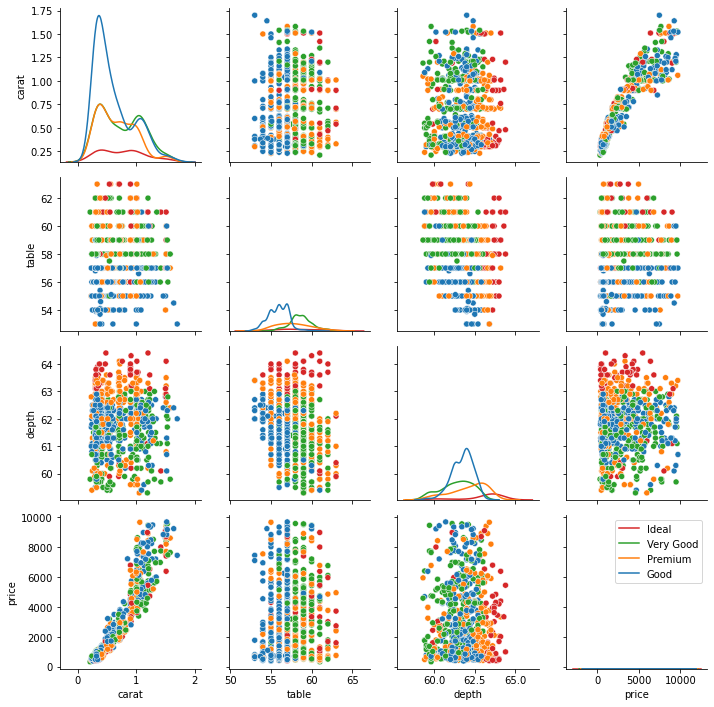

In [299]:
# sns.distplot(a=df.carat, hist=False)

df_cut = df.filter(['carat','table','depth','price','cut'])

m = sns.PairGrid(df_cut, hue = 'cut')
m.map_offdiag(sns.scatterplot)
m.map_diag(sns.kdeplot)

plt.legend(df['cut'].unique())



## Where is the difference between diamonds with 'Ideal' vs 'Premium' cuts most visible? Explain.

In the carat/size of the diamond. 


## Discuss with the help of a heatmap the correlation of the following variables:
Carat, depth, table and price

## Furthermore what does this correlation tell us of a diamond?

<function matplotlib.pyplot.show(close=None, block=None)>

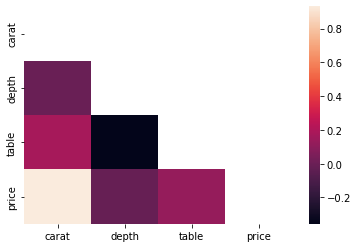

In [317]:
df_v = df.filter(['carat','depth','table','price'],axis = 1)

mask = np.zeros_like(df_v.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

sns.heatmap(df_v.corr(), mask = mask)
plt.show


strong positive (almost perfect) correlation between carat and price.
negligible positive correlation between carat and table.
negligible positive correlation between carat and depth.
weak negative correlation between depth and table. 
no correlation between depth and carat.
no correlation between depth and price. 
negligible positive correltion between table and price.


# Categorical features

## To visualise the distributions of each category, plot boxplots for each of the following features:
(Price, carat, table, depth) vs (cut, color, clarity)

### Furthermore, order the boxplots within a plot by their mean value
Hint: pd.sort_values() is your friend.

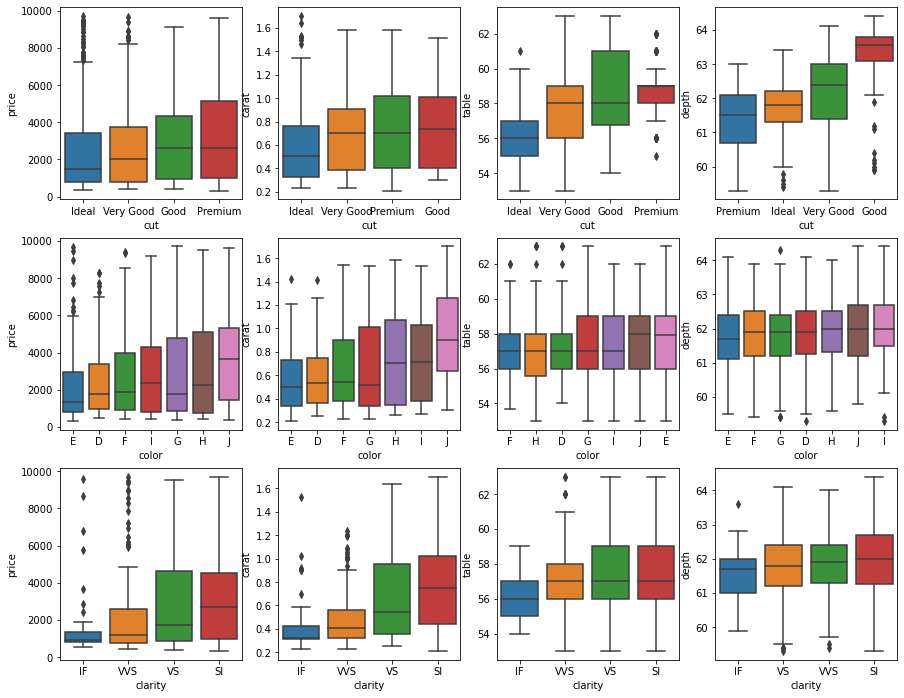

In [300]:
fig, ax = plt.subplots(3,4, figsize=(15,12))
features = ['price','carat','table','depth']
categories = ['cut','color','clarity']

for category in categories:
    for feature in features:
        # sort values
        
        sort_in = df.groupby(category)[feature].mean().sort_values().index
       
        
        # plot boxplot
    
        
        sns.boxplot(x = df[category],y = df[feature],order = list(sort_in), ax=ax[categories.index(category),features.index(feature)])
    
    
plt.tight_layout
plt.show()

## Discuss any visible tendencies that can be exhibited in the plots above.

The better the cut of the diamond the higher the price. 
Difference in colour have negligibl/no correlation to table. 
Diamonds classified with VS clarity tend to be the most expensive. 


## Which single categorical feature has the largest influence on each of the numerical features?

The color (categorical feature) has the largest influence on the price(numerical feature).
